In [2]:
from pyomo.environ import *
from pyomo.dae import *
import numpy as np
import matplotlib.pyplot as plt

In [4]:
m = ConcreteModel()
m.t = ContinuousSet(bounds=(0, 1))

m.x = Var(m.t)
m.y = Var(m.t)
m.v = Var(m.t)

# Control variables
m.u = Var(m.t, bounds=(0, 2 * np.pi))
m.tf = Var(bounds=(0, 10))


m.x_dot = DerivativeVar(m.x)
m.y_dot = DerivativeVar(m.y)
m.v_dot = DerivativeVar(m.v)

g = 9.81

m.eq1 = Constraint(m.t, rule=lambda m, t: m.x_dot[t] == m.v[t] * sin(m.u[t]) * m.tf)
m.eq2 = Constraint(m.t, rule=lambda m, t: m.y_dot[t] == -m.v[t] * cos(m.u[t]) * m.tf)
m.eq3 = Constraint(m.t, rule=lambda m, t: m.v_dot[t] == g * cos(m.u[t]) * m.tf)

m.c = ConstraintList()
m.c.add(m.x[0] == 0)
m.c.add(m.y[0] == 0)
m.c.add(m.v[0] == 0)

m.c.add(m.x[1] == 2)
m.c.add(m.y[1] == -2)

m.obj = Objective(expr=m.tf)

TransformationFactory(
    "dae.finite_difference"
    ).apply_to(m, wrt=m.t, nfe=100)
SolverFactory("ipopt").solve(m).write()


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 608
  Number of variables: 708
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.14.2\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 1.8585691452026367
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0


Final Time: 0.8213508731469743


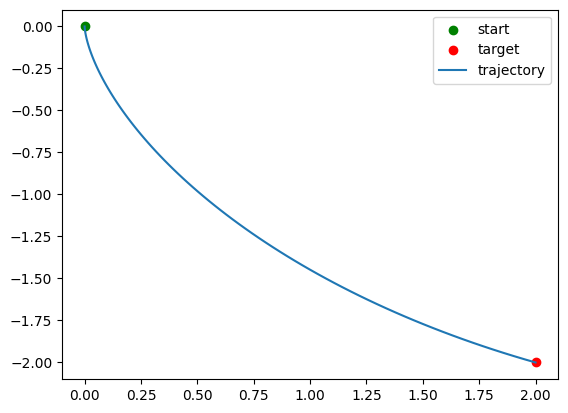

In [6]:
x = [m.x[t]() for t in m.t]
y = [m.y[t]() for t in m.t]

print("Final Time: " + str(m.tf()))
plt.figure()
plt.scatter(0, 0, label="start", c="g")
plt.scatter(2, -2, label="target", c="r")
# plt.scatter(x.value[0], y.value[0], label="start", c="g")
# plt.scatter(x.value[-1], y.value[-1], label="end", c="r")
plt.plot(x, y, label="trajectory")

plt.legend()

plt.show()